In [1]:
import pandas as pd

##### General notes:
- Solar generation is not normalized, with a max clean value of 0.04, so eps should be 0.0001 or something super small
- I suspect there's a similar issue with net comsumption, since it seems to be the sum of solar generation and non shitable load (and the battery). from the analysis stuck on my rmc machine...
- net_electricity_consumption 0.016, so eps should be ~0.03 of this.
- Price is time based (difference if often 0), so perturbations are obvious, this is not the case for realtime pricing
- Larger changes to SoC can result from attack actions

##### Load data

In [2]:
df_variation = pd.DataFrame({})
df_variation['PPO_baseline'] = pd.read_csv('20 bin PPO 500 results/baseline_obs.csv',
                                            index_col=0,
                                            ).diff().abs().mean()
df_variation['dynamic_uACG'] = pd.read_csv(r'20 bin PPO 500 results\adv_perturbed_obs.csv',
                                            index_col=0,
                                            ).diff().abs().mean()
s_load = pd.read_csv(r'20 bin PPO 500 results\bb results\bb obs.csv',
                                  header=0,
                                  index_col=0,
                                  ).diff().abs().mean()
s_load.index = df_variation.index
df_variation['uBB'] = s_load

df_variation['PPO_bifurcated_myPGD_05'] = pd.read_csv(r'20 bin PPO 500 results\untargeted_binary_myPGD_05_adv_obs-a.csv',
                                            index_col=0,
                                            usecols = lambda x: x != 'a', #excludes a col
                                            ).diff().abs().mean()
df_variation['PPO_bifurcated_ACG_05'] = pd.read_csv(r'20 bin PPO 500 results\binary classifier uACG results\uACG DLloss 05 eps adv a-obs.csv',
                                                                index_col=0,
                                                                usecols = lambda x: x != 'a', #excludes a col
                                                                ).diff().abs().mean() 
df_variation['PPO_myPGD_05'] = pd.read_csv(r'20 bin PPO 500 results\untargeted_myPGD_05_adv_obs-a.csv',
                                            index_col=0,
                                            usecols = lambda x: x != 'a', #excludes a col
                                            ).diff().abs().mean()
df_variation['PPO_bifurcated_myPGD_03_mask_time'] = pd.read_csv(r'20 bin PPO 500 results\untargeted_binary_myPGD_03_mask_time_adv_obs-a.csv',
                                                                index_col=0,
                                                                usecols = lambda x: x != 'a', #excludes a col
                                                                ).diff().abs().mean()
df_variation['PPO_bifurcated_myPGD_03_mask_time_time_scale_solar_and_consumption_eps'] = pd.read_csv(
                                                                r'20 bin PPO 500 results\untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps_adv_obs-a.csv',
                                                                index_col=0,
                                                                usecols = lambda x: x != 'a', #excludes a col
                                                                ).diff().abs().mean()
df_variation['PPO_bifurcated_ACG_03_mask_solar_time_and_consumption_adv_obs'] = pd.read_csv(
                                                                r'20 bin PPO 500 results\binary classifier uACG results\bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption adv a-obs.csv',
                                                                index_col=0,
                                                                usecols = lambda x: x != 'a', #excludes a col
                                                                ).diff().abs().mean()
df_variation['SAC_baseline'] = pd.read_csv(r'default SAC 500 norm space results\baseline_obs-a.csv',
                                            index_col=0,
                                            usecols = lambda x: x != 'a', #excludes a col
                                            ).diff().abs().mean()                                          
df_variation['SAC_bifurcated_myPGD_03_mask_time'] = pd.read_csv(r'default SAC 500 norm space results\untargeted_binary_myPGD_03_mask_time_adv_obs-a.csv',
                                                                index_col=0,
                                                                usecols = lambda x: x != 'a', #excludes a col
                                                                ).diff().abs().mean()
df_variation['SAC_bifurcated_myPGD_03_mask_time_time_scale_solar_and_consumption_eps'] = pd.read_csv(
                                                                r'default SAC 500 norm space results\untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps_adv_obs-a.csv',
                                                                index_col=0,
                                                                usecols = lambda x: x != 'a', #excludes a col
                                                                ).diff().abs().mean()
df_variation['SAC_bifurcated_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs'] = pd.read_csv(
                                                                r'default SAC 500 norm space results\untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs_adv_obs-a.csv',
                                                                index_col=0,
                                                                usecols = lambda x: x != 'a', #excludes a col
                                                                ).diff().abs().mean()               
df_variation['SAC_bifurcated_ACG_03_mask_solar_time_and_consumption_adv_obs'] = pd.read_csv(
                                                                r'default SAC 500 norm space results\bifurcated_uACG_DLloss_03_mask_time_solar_and_consumption adv a-obs.csv',
                                                                index_col=0,
                                                                usecols = lambda x: x != 'a', #excludes a col
                                                                ).diff().abs().mean()        
df_variation['SAC_toggle_bifurcated_myPGD_03_mask_time'] = pd.read_csv(r'default SAC 500 norm space results\toggle_binary_myPGD_03_mask_time_adv_obs-a.csv',
                                                                index_col=0,
                                                                usecols = lambda x: x != 'a', #excludes a col
                                                                ).diff().abs().mean()      
df_variation['SAC_toggle_bifurcated_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs'] = pd.read_csv(
                                                                r'default SAC 500 norm space results\toggle_binary_myPGD_03_mask_time_and_solar_scale_consumption_eps_clipped_adv_obs-a.csv',
                                                                index_col=0,
                                                                usecols = lambda x: x != 'a', #excludes a col
                                                                ).diff().abs().mean() 

Load the spread for non prediction or temporal observations

In [3]:
obs_spread = pd.read_csv('citylearn_challenge_2022_phase_2 spread.csv',
                            index_col=0)

##### Analyze Dynamic uACG

Notice how bother SoC's and net consumption's variation are orders of magnitude above the others, perhaps the epsilon should be reduced? Or is the net consumption just affected by the SoC/the attack? The only features with significant variations are related to the agent's actions which the attack is meant to change

In [4]:
abs(df_variation['dynamic_uACG'] - df_variation['PPO_baseline']).sort_values(ascending=False)

solar_generation                              0.025049
electricity_pricing_predicted_12h             0.023835
net_electricity_consumption                   0.023731
electricity_pricing_predicted_6h              0.023526
electricity_pricing                           0.023397
electricity_pricing_predicted_24h             0.022813
month_cos                                     0.019033
month_sin                                     0.018465
day_type_cos                                  0.018446
day_type_sin                                  0.018290
direct_solar_irradiance_predicted_12h         0.015714
direct_solar_irradiance_predicted_24h         0.015415
direct_solar_irradiance_predicted_6h          0.015133
direct_solar_irradiance                       0.015064
diffuse_solar_irradiance_predicted_12h        0.014216
outdoor_dry_bulb_temperature                  0.013410
diffuse_solar_irradiance                      0.013381
diffuse_solar_irradiance_predicted_6h         0.013195
carbon_int

Relative change in feature variation from attack:

In [5]:
abs(df_variation['dynamic_uACG']/df_variation['PPO_baseline']).sort_values(ascending=False)

solar_generation                              98.063482
month_cos                                     84.346173
month_sin                                     81.857822
net_electricity_consumption                   37.835382
day_type_cos                                   2.819895
day_type_sin                                   2.529823
outdoor_dry_bulb_temperature                   1.509344
outdoor_dry_bulb_temperature_predicted_12h     1.497756
outdoor_dry_bulb_temperature_predicted_6h      1.489966
carbon_intensity                               1.489269
outdoor_dry_bulb_temperature_predicted_24h     1.484286
electricity_pricing_predicted_12h              1.328781
electricity_pricing_predicted_6h               1.324514
electricity_pricing                            1.322741
electricity_pricing_predicted_24h              1.314687
diffuse_solar_irradiance_predicted_12h         1.225630
direct_solar_irradiance_predicted_12h          1.223749
direct_solar_irradiance_predicted_24h          1

In [6]:
df_net_consumption = pd.DataFrame({})
df_net_consumption['PPO_baseline'] = pd.read_csv('20 bin PPO 500 results/baseline_obs.csv',
                                            usecols=['net_electricity_consumption']
                                            )
df_net_consumption['dynamic_uACG'] = pd.read_csv(r'20 bin PPO 500 results\adv_perturbed_obs.csv',
                                            usecols=['net_electricity_consumption']
                                            )

<Axes: >

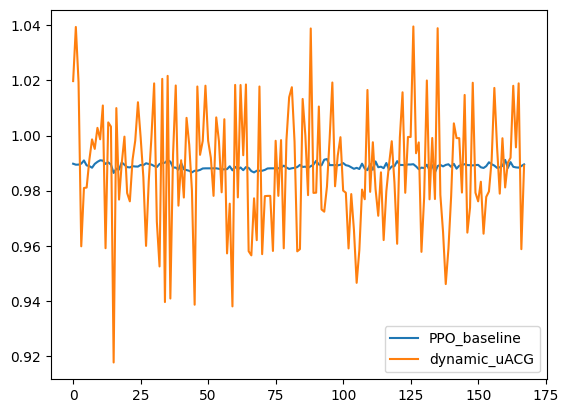

In [7]:
df_net_consumption.iloc[:24*7,:].plot.line()

In [8]:
df_solar_gen = pd.DataFrame({})
df_solar_gen['PPO_baseline'] = pd.read_csv('20 bin PPO 500 results/baseline_obs.csv',
                                            usecols=['solar_generation']
                                            )
df_solar_gen['dynamic_uACG'] = pd.read_csv(r'20 bin PPO 500 results\adv_perturbed_obs.csv',
                                            usecols=['solar_generation']
                                            )

Attack disrupts the periocity of solar power generation, and aloows negative values which are non-sensical. Because this feature is poorly normalized (the observed clean values are far from 1) $\epsilon$ should be reduced accordingly. However, the attack further needs to clamp features in the observation space [0,1]. In theory ART should do this as it's passed the observation space, however this is not the case...this will need to be cliped.clamped in my code and myPGD

<Axes: >

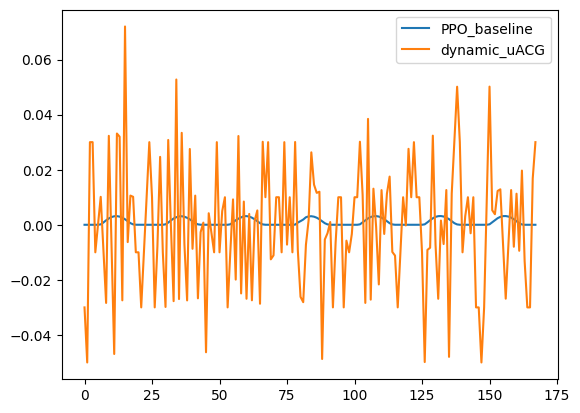

In [9]:
df_solar_gen.iloc[:24*7,:].plot.line()

For the graph above, note how no variation is great than 0.07, however the observation peaks at like 0.005. Because the feature is often abserved near 0, perturbations are making it negative. Apparently poor normalization is a defence mechanism!

In [10]:
print(f'The peak value for solar generation during a clean baseline episode: {df_solar_gen["PPO_baseline"].max()}')

The peak value for solar generation during a clean baseline episode: 0.004


In [11]:
pd.read_csv('20 bin PPO 500 results/baseline_obs.csv',
                                            usecols=['net_electricity_consumption']
                                            ).describe()

,net_electricity_consumption
count,8759.000000
mean,0.988657
std,0.001271
min,0.984415
25%,0.987880
50%,0.988587
75%,0.989420
max,0.995658


note that net_electricity_consumption does not go below 0.984415 so the actual variation is:

In [12]:
1 - 0.984415

0.01558499999999996

This is far from [0,1]

The result above indicates ineffective min-max normalization

##### Analyze uBB

In [13]:
abs(df_variation['uBB'] - df_variation['PPO_baseline']).sort_values(ascending=False)

month_sin                                     0.031792
month_cos                                     0.031749
day_type_cos                                  0.031031
day_type_sin                                  0.029450
electricity_pricing_predicted_24h             0.023513
electricity_pricing                           0.022821
electricity_pricing_predicted_12h             0.022775
net_electricity_consumption                   0.021704
carbon_intensity                              0.020671
electricity_pricing_predicted_6h              0.020620
solar_generation                              0.020420
outdoor_dry_bulb_temperature_predicted_12h    0.019681
outdoor_dry_bulb_temperature_predicted_6h     0.019672
outdoor_dry_bulb_temperature                  0.019347
outdoor_dry_bulb_temperature_predicted_24h    0.018894
outdoor_relative_humidity                     0.016361
outdoor_relative_humidity_predicted_12h       0.016150
outdoor_relative_humidity_predicted_24h       0.015632
direct_sol

Relative change in feature variation from attack:

In [14]:
abs(df_variation['uBB']/df_variation['PPO_baseline']).sort_values(ascending=False)

month_sin                                     140.215572
month_cos                                     140.027826
solar_generation                               80.124628
net_electricity_consumption                    34.689125
day_type_cos                                    4.061501
day_type_sin                                    3.463318
carbon_intensity                                1.771262
outdoor_dry_bulb_temperature_predicted_12h      1.747533
outdoor_dry_bulb_temperature_predicted_6h       1.747132
outdoor_dry_bulb_temperature                    1.734845
outdoor_dry_bulb_temperature_predicted_24h      1.717709
outdoor_relative_humidity                       1.333088
outdoor_relative_humidity_predicted_12h         1.328765
electricity_pricing_predicted_24h               1.324340
outdoor_relative_humidity_predicted_24h         1.318245
electricity_pricing                             1.314801
electricity_pricing_predicted_12h               1.314158
outdoor_relative_humidity_predi

##### Analyze bifurcated myPDG $\epsilon = 0.05$ for the discrete PPO

In [15]:
abs(df_variation['PPO_bifurcated_myPGD_05'] - df_variation['PPO_baseline']).sort_values(ascending=False)

month_sin                                     0.040764
month_cos                                     0.039204
day_type_cos                                  0.039117
day_type_sin                                  0.037345
electricity_pricing_predicted_6h              0.036479
electricity_pricing_predicted_12h             0.033139
net_electricity_consumption                   0.032049
electricity_pricing_predicted_24h             0.031874
carbon_intensity                              0.026065
outdoor_dry_bulb_temperature_predicted_12h    0.025762
direct_solar_irradiance_predicted_12h         0.025744
electricity_pricing                           0.025039
outdoor_dry_bulb_temperature_predicted_6h     0.024767
direct_solar_irradiance_predicted_6h          0.024701
solar_generation                              0.024312
direct_solar_irradiance                       0.024029
direct_solar_irradiance_predicted_24h         0.023636
outdoor_relative_humidity                     0.023144
outdoor_dr

In [16]:
abs(df_variation['PPO_bifurcated_myPGD_05']/df_variation['PPO_baseline']).sort_values(ascending=False)

month_sin                                     179.503759
month_cos                                     172.676258
solar_generation                               95.206818
net_electricity_consumption                    50.746418
day_type_cos                                    4.859319
day_type_sin                                    4.123630
outdoor_dry_bulb_temperature_predicted_12h      1.978510
carbon_intensity                                1.972529
outdoor_dry_bulb_temperature_predicted_6h       1.940606
outdoor_dry_bulb_temperature_predicted_24h      1.871743
outdoor_dry_bulb_temperature                    1.781864
electricity_pricing_predicted_6h                1.503196
outdoor_relative_humidity                       1.471197
electricity_pricing_predicted_12h               1.457127
electricity_pricing_predicted_24h               1.439675
outdoor_relative_humidity_predicted_12h         1.426459
outdoor_relative_humidity_predicted_6h          1.399093
direct_solar_irradiance_predict

##### Analyze myPDG $\epsilon = 0.05$ for the discrete PPO

Deviation in mean feature variation from baseline

In [17]:
abs(df_variation['PPO_myPGD_05'] - df_variation['PPO_baseline']).sort_values(ascending=False)

electricity_pricing                           0.035087
day_type_sin                                  0.034570
electricity_pricing_predicted_6h              0.034067
solar_generation                              0.033933
net_electricity_consumption                   0.033920
day_type_cos                                  0.031529
electricity_pricing_predicted_24h             0.029497
carbon_intensity                              0.024212
direct_solar_irradiance_predicted_24h         0.023872
electricity_pricing_predicted_12h             0.023142
direct_solar_irradiance_predicted_6h          0.022577
outdoor_relative_humidity_predicted_24h       0.021040
direct_solar_irradiance                       0.019921
outdoor_relative_humidity_predicted_6h        0.019059
outdoor_relative_humidity_predicted_12h       0.018673
direct_solar_irradiance_predicted_12h         0.018456
diffuse_solar_irradiance_predicted_6h         0.017992
diffuse_solar_irradiance_predicted_12h        0.017673
outdoor_dr

Relative change in feature variation from attack:

In [18]:
abs(df_variation['PPO_myPGD_05']/df_variation['PPO_baseline']).sort_values(ascending=False)

solar_generation                              132.488908
net_electricity_consumption                    53.650704
month_sin                                      30.735002
month_cos                                      21.818127
day_type_cos                                    4.110653
day_type_sin                                    3.891518
carbon_intensity                                1.903360
outdoor_dry_bulb_temperature_predicted_6h       1.623137
outdoor_dry_bulb_temperature_predicted_24h      1.581909
outdoor_dry_bulb_temperature_predicted_12h      1.502788
electricity_pricing                             1.483989
outdoor_dry_bulb_temperature                    1.480292
electricity_pricing_predicted_6h                1.469920
outdoor_relative_humidity_predicted_24h         1.428345
electricity_pricing_predicted_24h               1.406881
outdoor_relative_humidity_predicted_6h          1.387962
outdoor_relative_humidity_predicted_12h         1.380132
direct_solar_irradiance_predict

##### Analyze bifurcated myPDG $\epsilon = 0.03$ with time mask for the discrete PPO

In [19]:
abs(df_variation['PPO_bifurcated_myPGD_03_mask_time'] - df_variation['PPO_baseline']).sort_values(ascending=False)

electricity_pricing_predicted_6h              0.023301
net_electricity_consumption                   0.021438
electricity_pricing_predicted_12h             0.020734
electricity_pricing_predicted_24h             0.020316
electricity_pricing                           0.016575
solar_generation                              0.016134
direct_solar_irradiance_predicted_12h         0.015861
direct_solar_irradiance                       0.015043
direct_solar_irradiance_predicted_6h          0.014823
direct_solar_irradiance_predicted_24h         0.014809
outdoor_dry_bulb_temperature_predicted_12h    0.014266
carbon_intensity                              0.014057
outdoor_dry_bulb_temperature_predicted_6h     0.013803
diffuse_solar_irradiance_predicted_12h        0.013279
outdoor_dry_bulb_temperature_predicted_24h    0.013091
outdoor_dry_bulb_temperature                  0.011793
diffuse_solar_irradiance_predicted_6h         0.011577
electrical_storage_soc                        0.011445
outdoor_re

Relative change in feature variation from attack:

In [20]:
abs(df_variation['PPO_bifurcated_myPGD_03_mask_time']/df_variation['PPO_baseline']).sort_values(ascending=False)

solar_generation                              63.518776
net_electricity_consumption                   34.276677
outdoor_dry_bulb_temperature_predicted_12h     1.541833
carbon_intensity                               1.524493
outdoor_dry_bulb_temperature_predicted_6h      1.524230
outdoor_dry_bulb_temperature_predicted_24h     1.497293
outdoor_dry_bulb_temperature                   1.447954
electricity_pricing_predicted_6h               1.321416
electricity_pricing_predicted_12h              1.286002
electricity_pricing_predicted_24h              1.280237
outdoor_relative_humidity                      1.229675
electricity_pricing                            1.228635
direct_solar_irradiance_predicted_12h          1.225841
outdoor_relative_humidity_predicted_12h        1.214322
direct_solar_irradiance                        1.214164
direct_solar_irradiance_predicted_6h           1.211061
direct_solar_irradiance_predicted_24h          1.210836
diffuse_solar_irradiance_predicted_12h         1

##### Analyze bifurcated myPDG $\epsilon = 0.03$ with time mask for the discrete SAC

In [21]:
abs(df_variation['SAC_bifurcated_myPGD_03_mask_time'] - df_variation['SAC_baseline']).sort_values(ascending=False)

electrical_storage_soc                        0.048745
net_electricity_consumption                   0.023921
electricity_pricing_predicted_24h             0.023265
electricity_pricing                           0.023165
electricity_pricing_predicted_6h              0.022468
electricity_pricing_predicted_12h             0.021937
solar_generation                              0.018538
direct_solar_irradiance_predicted_12h         0.015350
direct_solar_irradiance_predicted_6h          0.014859
direct_solar_irradiance                       0.014187
direct_solar_irradiance_predicted_24h         0.013893
outdoor_dry_bulb_temperature_predicted_6h     0.013788
outdoor_dry_bulb_temperature_predicted_24h    0.013710
diffuse_solar_irradiance_predicted_12h        0.013647
outdoor_dry_bulb_temperature_predicted_12h    0.013603
diffuse_solar_irradiance_predicted_6h         0.012983
carbon_intensity                              0.012918
outdoor_dry_bulb_temperature                  0.012702
diffuse_so

Relative change in feature variation from attack:

In [22]:
abs(df_variation['SAC_bifurcated_myPGD_03_mask_time']/df_variation['SAC_baseline']).sort_values(ascending=False)

solar_generation                              72.834828
net_electricity_consumption                   38.300434
electrical_storage_soc                         1.756495
outdoor_dry_bulb_temperature_predicted_6h      1.523665
outdoor_dry_bulb_temperature_predicted_24h     1.520803
outdoor_dry_bulb_temperature_predicted_12h     1.516681
outdoor_dry_bulb_temperature                   1.482453
carbon_intensity                               1.481979
electricity_pricing_predicted_24h              1.320922
electricity_pricing                            1.319542
electricity_pricing_predicted_6h               1.309930
electricity_pricing_predicted_12h              1.302604
outdoor_relative_humidity_predicted_24h        1.227469
outdoor_relative_humidity_predicted_6h         1.224295
outdoor_relative_humidity                      1.219446
direct_solar_irradiance_predicted_12h          1.218568
diffuse_solar_irradiance_predicted_12h         1.216599
outdoor_relative_humidity_predicted_12h        1

##### Analyze bifurcated myPGD $\epsilon = 0.03$ with time mask and scaling $\epsilon$ for solar generation and net consumption for the discrete PPO

In [23]:
abs(df_variation['PPO_bifurcated_myPGD_03_mask_time_time_scale_solar_and_consumption_eps'] - df_variation['SAC_baseline']).sort_values(ascending=False)

electrical_storage_soc                        0.028774
electricity_pricing_predicted_6h              0.023193
electricity_pricing_predicted_12h             0.020686
electricity_pricing_predicted_24h             0.020037
electricity_pricing                           0.016452
direct_solar_irradiance_predicted_12h         0.015801
direct_solar_irradiance_predicted_6h          0.015136
direct_solar_irradiance                       0.015064
direct_solar_irradiance_predicted_24h         0.014737
outdoor_dry_bulb_temperature_predicted_12h    0.014434
carbon_intensity                              0.014079
outdoor_dry_bulb_temperature_predicted_6h     0.014020
diffuse_solar_irradiance_predicted_12h        0.013172
outdoor_dry_bulb_temperature_predicted_24h    0.012996
diffuse_solar_irradiance_predicted_6h         0.011757
outdoor_dry_bulb_temperature                  0.011663
outdoor_relative_humidity                     0.011353
outdoor_relative_humidity_predicted_12h       0.010749
outdoor_re

Relative change in feature variation from attack:

In [24]:
abs(df_variation['PPO_bifurcated_myPGD_03_mask_time_time_scale_solar_and_consumption_eps']/df_variation['PPO_baseline']).sort_values(ascending=False)

solar_generation                              3.140814
outdoor_dry_bulb_temperature_predicted_12h    1.548234
outdoor_dry_bulb_temperature_predicted_6h     1.532460
carbon_intensity                              1.525301
outdoor_dry_bulb_temperature_predicted_24h    1.493689
outdoor_dry_bulb_temperature                  1.443014
net_electricity_consumption                   1.383437
electricity_pricing_predicted_6h              1.319928
electricity_pricing_predicted_12h             1.285347
electricity_pricing_predicted_24h             1.276394
outdoor_relative_humidity                     1.231131
electricity_pricing                           1.226946
direct_solar_irradiance_predicted_12h         1.224984
outdoor_relative_humidity_predicted_12h       1.218832
direct_solar_irradiance_predicted_6h          1.215530
direct_solar_irradiance                       1.214467
direct_solar_irradiance_predicted_24h         1.209803
diffuse_solar_irradiance_predicted_12h        1.209068
outdoor_re

Is the relative variation in solar generation from pertubations at night increasing the mean difference? plot

In [25]:
df_solar_gen['PPO_bifurcated_myPGD_03_mask_time_time_scale_solar_and_consumption_eps'] = pd.read_csv(r'20 bin PPO 500 results\untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps_adv_obs-a.csv',
                                            usecols=['solar_generation']
                                            )

<Axes: >

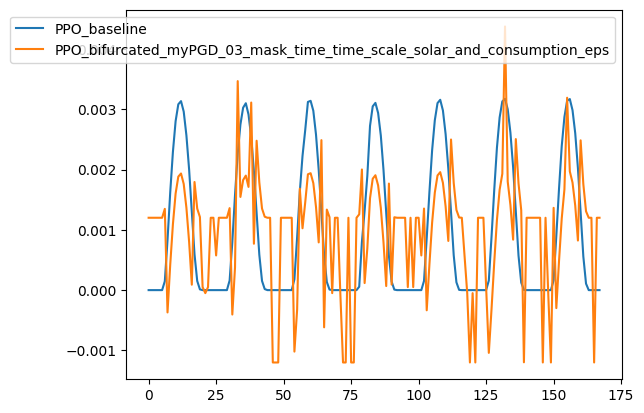

In [26]:
df_solar_gen.iloc[:24*7,[0,2]].plot.line()

Perturbations are still made at night and are negative, but now they are on a similar scale. Attacker could check if this feature is 0 and assign an $\epsilon$ appropriately

##### Analyze bifurcated myPDG $\epsilon = 0.03$ with time mask and scaling $\epsilon$ for solar generation and net consumption for the SAC

In [27]:
abs(df_variation['SAC_bifurcated_myPGD_03_mask_time_time_scale_solar_and_consumption_eps'] - df_variation['SAC_baseline']).sort_values(ascending=False)

electrical_storage_soc                        0.034473
electricity_pricing                           0.022663
electricity_pricing_predicted_24h             0.022332
electricity_pricing_predicted_12h             0.022000
electricity_pricing_predicted_6h              0.021644
direct_solar_irradiance_predicted_12h         0.015122
direct_solar_irradiance                       0.014420
direct_solar_irradiance_predicted_6h          0.014256
outdoor_dry_bulb_temperature_predicted_12h    0.014211
outdoor_dry_bulb_temperature_predicted_24h    0.013790
direct_solar_irradiance_predicted_24h         0.013751
outdoor_dry_bulb_temperature_predicted_6h     0.013572
diffuse_solar_irradiance_predicted_12h        0.013324
carbon_intensity                              0.012717
diffuse_solar_irradiance_predicted_6h         0.012702
outdoor_dry_bulb_temperature                  0.012592
diffuse_solar_irradiance_predicted_24h        0.011389
diffuse_solar_irradiance                      0.011183
outdoor_re

Relative change in feature variation from attack:

In [28]:
abs(df_variation['SAC_bifurcated_myPGD_03_mask_time_time_scale_solar_and_consumption_eps']/df_variation['SAC_baseline']).sort_values(ascending=False)

solar_generation                              3.606673
net_electricity_consumption                   1.999451
outdoor_dry_bulb_temperature_predicted_12h    1.539753
electrical_storage_soc                        1.535006
outdoor_dry_bulb_temperature_predicted_24h    1.523820
outdoor_dry_bulb_temperature_predicted_6h     1.515447
outdoor_dry_bulb_temperature                  1.478285
carbon_intensity                              1.474470
electricity_pricing                           1.312618
electricity_pricing_predicted_24h             1.308049
electricity_pricing_predicted_12h             1.303476
electricity_pricing_predicted_6h              1.298558
outdoor_relative_humidity_predicted_6h        1.219039
direct_solar_irradiance_predicted_12h         1.215322
outdoor_relative_humidity_predicted_12h       1.212871
diffuse_solar_irradiance_predicted_12h        1.211485
outdoor_relative_humidity                     1.209783
direct_solar_irradiance                       1.205288
outdoor_re

Variation in net consumption might be related to SoC, which is the attacks goal, but the absolute variation in solar generation is still too high. Similar to the descrete PPO  plot aboveabove

##### Analyze SAC bifurcated myPDG $\epsilon = 0.03$ with:
- solar generation and time mask
- scaling $\epsilon$ for net consumption, and
- clipped adversarial observations

This attack has the smallest variations with a (kinda) significant adversarial regret, and should be used for further analysis:
- time plots of clean and adversarial non-prediction features
- prediction accuracy

In [29]:
abs(df_variation['SAC_bifurcated_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs'] - df_variation['SAC_baseline']).sort_values(ascending=False)

electricity_pricing                           0.015184
electricity_pricing_predicted_24h             0.015122
electricity_pricing_predicted_6h              0.014678
electricity_pricing_predicted_12h             0.014041
outdoor_dry_bulb_temperature_predicted_12h    0.014010
outdoor_dry_bulb_temperature_predicted_24h    0.013615
outdoor_dry_bulb_temperature_predicted_6h     0.013467
outdoor_dry_bulb_temperature                  0.012792
carbon_intensity                              0.012507
outdoor_relative_humidity_predicted_6h        0.010646
outdoor_relative_humidity_predicted_12h       0.010005
outdoor_relative_humidity_predicted_24h       0.009926
outdoor_relative_humidity                     0.009741
direct_solar_irradiance_predicted_12h         0.007165
direct_solar_irradiance_predicted_6h          0.006906
direct_solar_irradiance_predicted_24h         0.006765
direct_solar_irradiance                       0.006465
diffuse_solar_irradiance_predicted_12h        0.006388
diffuse_so

In [30]:
obs_spread

,spread
outdoor_dry_bulb_temperature,26.600000
outdoor_dry_bulb_temperature_predicted_6h,26.600000
outdoor_dry_bulb_temperature_predicted_12h,26.600000
outdoor_dry_bulb_temperature_predicted_24h,26.600000
outdoor_relative_humidity,90.000000
outdoor_relative_humidity_predicted_6h,90.000000
outdoor_relative_humidity_predicted_12h,90.000000
outdoor_relative_humidity_predicted_24h,90.000000
diffuse_solar_irradiance,1017.000000
diffuse_solar_irradiance_predicted_6h,1017.000000


variation difference with units

In [31]:
(abs(df_variation['SAC_bifurcated_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs'] - df_variation['SAC_baseline']).mul(obs_spread.T)).T

,spread
carbon_intensity,0.002644
day_type_cos,NaN
day_type_sin,NaN
diffuse_solar_irradiance,4.672507
diffuse_solar_irradiance_predicted_12h,6.496882
diffuse_solar_irradiance_predicted_24h,5.272457
diffuse_solar_irradiance_predicted_6h,6.070125
direct_solar_irradiance,6.160794
direct_solar_irradiance_predicted_12h,6.828443
direct_solar_irradiance_predicted_24h,6.446946


Relative change in feature variation from attack:

In [32]:
abs(df_variation['SAC_bifurcated_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs']/df_variation['SAC_baseline']).sort_values(ascending=False)

outdoor_dry_bulb_temperature_predicted_12h    1.532128
outdoor_dry_bulb_temperature_predicted_24h    1.517167
net_electricity_consumption                   1.512310
outdoor_dry_bulb_temperature_predicted_6h     1.511448
outdoor_dry_bulb_temperature                  1.485889
carbon_intensity                              1.466645
outdoor_relative_humidity_predicted_6h        1.216715
electricity_pricing                           1.209447
electricity_pricing_predicted_24h             1.208588
outdoor_relative_humidity_predicted_12h       1.203683
electricity_pricing_predicted_6h              1.202466
outdoor_relative_humidity_predicted_24h       1.202082
outdoor_relative_humidity                     1.198319
electricity_pricing_predicted_12h             1.193685
direct_solar_irradiance_predicted_12h         1.102023
diffuse_solar_irradiance_predicted_12h        1.101394
direct_solar_irradiance_predicted_6h          1.098340
direct_solar_irradiance_predicted_24h         1.096310
diffuse_so

##### Analyze bifurcated ACG $\epsilon = 0.03$ masking time, solar generation and net consumption for the SAC

In [42]:
abs(df_variation['PPO_bifurcated_ACG_03_mask_solar_time_and_consumption_adv_obs'] - df_variation['PPO_baseline']).sort_values(ascending=False)

direct_solar_irradiance                       0.031151
electricity_pricing_predicted_6h              0.027009
direct_solar_irradiance_predicted_24h         0.024687
month_cos                                     0.020927
month_sin                                     0.020689
diffuse_solar_irradiance_predicted_12h        0.018411
direct_solar_irradiance_predicted_12h         0.017160
net_electricity_consumption                   0.016232
hour_sin                                      0.015984
outdoor_dry_bulb_temperature_predicted_24h    0.015070
electricity_pricing_predicted_24h             0.014834
outdoor_dry_bulb_temperature                  0.014525
electricity_pricing                           0.013948
day_type_cos                                  0.013930
outdoor_dry_bulb_temperature_predicted_6h     0.013464
solar_generation                              0.013223
outdoor_dry_bulb_temperature_predicted_12h    0.012910
carbon_intensity                              0.012379
diffuse_so

Relative change in feature variation from attack:

In [41]:
abs(df_variation['PPO_bifurcated_ACG_03_mask_solar_time_and_consumption_adv_obs']/df_variation['PPO_baseline']).sort_values(ascending=False)

month_cos                                     92.639721
month_sin                                     91.597536
solar_generation                              52.240028
net_electricity_consumption                   26.195630
day_type_cos                                   2.374356
day_type_sin                                   1.911766
outdoor_dry_bulb_temperature_predicted_24h     1.572442
outdoor_dry_bulb_temperature                   1.551695
outdoor_dry_bulb_temperature_predicted_6h      1.511352
outdoor_dry_bulb_temperature_predicted_12h     1.490354
carbon_intensity                               1.461884
direct_solar_irradiance                        1.443490
electricity_pricing_predicted_6h               1.372558
direct_solar_irradiance_predicted_24h          1.351465
outdoor_relative_humidity                      1.208600
electricity_pricing_predicted_24h              1.204616
electricity_pricing                            1.192395
diffuse_solar_irradiance                       1

Smaller adv regret and variation in net consumption, suggesting the two are related

##### Analyze bifurcated ACG $\epsilon = 0.03$ masking time, solar generation and net consumption for the SAC

In [35]:
abs(df_variation['SAC_bifurcated_ACG_03_mask_solar_time_and_consumption_adv_obs'] - df_variation['SAC_baseline']).sort_values(ascending=False)

electrical_storage_soc                        0.031232
month_sin                                     0.021557
month_cos                                     0.021363
day_type_cos                                  0.020889
day_type_sin                                  0.019043
net_electricity_consumption                   0.016889
electricity_pricing                           0.016127
electricity_pricing_predicted_24h             0.016098
electricity_pricing_predicted_12h             0.015981
electricity_pricing_predicted_6h              0.015946
outdoor_dry_bulb_temperature_predicted_6h     0.014207
outdoor_dry_bulb_temperature_predicted_12h    0.013856
outdoor_dry_bulb_temperature                  0.013462
outdoor_dry_bulb_temperature_predicted_24h    0.013156
carbon_intensity                              0.012661
solar_generation                              0.012432
outdoor_relative_humidity_predicted_24h       0.010091
outdoor_relative_humidity_predicted_6h        0.009991
outdoor_re

Relative change in feature variation from attack:

In [36]:
abs(df_variation['SAC_bifurcated_ACG_03_mask_solar_time_and_consumption_adv_obs']/df_variation['SAC_baseline']).sort_values(ascending=False)

month_sin                                     95.399251
month_cos                                     94.549478
solar_generation                              49.172108
net_electricity_consumption                   27.335275
day_type_cos                                   3.060877
day_type_sin                                   2.592782
outdoor_dry_bulb_temperature_predicted_6h      1.539575
outdoor_dry_bulb_temperature_predicted_12h     1.526275
outdoor_dry_bulb_temperature                   1.511335
outdoor_dry_bulb_temperature_predicted_24h     1.499744
electrical_storage_soc                         1.484707
carbon_intensity                               1.472401
electricity_pricing                            1.222451
electricity_pricing_predicted_24h              1.222061
electricity_pricing_predicted_12h              1.220450
electricity_pricing_predicted_6h               1.219957
outdoor_relative_humidity_predicted_24h        1.205447
outdoor_relative_humidity_predicted_6h         1

##### Analyze toggle bifurcated myPGD $\epsilon = 0.03$ masking time

In [37]:
abs(df_variation['SAC_toggle_bifurcated_myPGD_03_mask_time'] - df_variation['SAC_baseline']).sort_values(ascending=False)

electrical_storage_soc                        0.131929
solar_generation                              0.040405
net_electricity_consumption                   0.033276
electricity_pricing_predicted_12h             0.030735
electricity_pricing_predicted_24h             0.030219
electricity_pricing_predicted_6h              0.030172
electricity_pricing                           0.029900
direct_solar_irradiance_predicted_12h         0.019679
direct_solar_irradiance                       0.019455
direct_solar_irradiance_predicted_6h          0.019377
direct_solar_irradiance_predicted_24h         0.019024
outdoor_dry_bulb_temperature                  0.018838
diffuse_solar_irradiance_predicted_12h        0.018290
outdoor_dry_bulb_temperature_predicted_12h    0.018279
outdoor_dry_bulb_temperature_predicted_6h     0.018272
diffuse_solar_irradiance_predicted_6h         0.018160
outdoor_dry_bulb_temperature_predicted_24h    0.017981
diffuse_solar_irradiance                      0.017311
carbon_int

In [38]:
abs(df_variation['SAC_toggle_bifurcated_myPGD_03_mask_time']/df_variation['SAC_baseline']).sort_values(ascending=False)

solar_generation                              157.568528
net_electricity_consumption                    52.888512
electrical_storage_soc                          3.047484
outdoor_dry_bulb_temperature                    1.715516
outdoor_dry_bulb_temperature_predicted_12h      1.694257
outdoor_dry_bulb_temperature_predicted_6h       1.693934
outdoor_dry_bulb_temperature_predicted_24h      1.683035
carbon_intensity                                1.642877
electricity_pricing_predicted_12h               1.423959
electricity_pricing_predicted_24h               1.416842
electricity_pricing_predicted_6h                1.416194
electricity_pricing                             1.412437
outdoor_relative_humidity_predicted_24h         1.297549
outdoor_relative_humidity                       1.290824
diffuse_solar_irradiance_predicted_12h          1.290303
diffuse_solar_irradiance_predicted_6h           1.288152
outdoor_relative_humidity_predicted_6h          1.283131
direct_solar_irradiance_predict

##### Analyze toggle bifurcated myPGD $\epsilon = 0.03$ masking time, solar generation and net consumption for the SAC

This has a lower adv regret than the corresponding bifurcation attack

In [39]:
abs(df_variation['SAC_toggle_bifurcated_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs'] - df_variation['SAC_baseline']).sort_values(ascending=False)

electricity_pricing_predicted_12h             0.021478
electricity_pricing_predicted_6h              0.020949
electricity_pricing_predicted_24h             0.020512
electricity_pricing                           0.020388
electrical_storage_soc                        0.019690
outdoor_dry_bulb_temperature                  0.019293
outdoor_dry_bulb_temperature_predicted_6h     0.019011
outdoor_dry_bulb_temperature_predicted_12h    0.018987
outdoor_dry_bulb_temperature_predicted_24h    0.018608
carbon_intensity                              0.017510
outdoor_relative_humidity                     0.014752
outdoor_relative_humidity_predicted_24h       0.014301
outdoor_relative_humidity_predicted_12h       0.013943
outdoor_relative_humidity_predicted_6h        0.013787
non_shiftable_load                            0.013104
direct_solar_irradiance                       0.010380
direct_solar_irradiance_predicted_6h          0.010024
direct_solar_irradiance_predicted_12h         0.009932
direct_sol

In [40]:
abs(df_variation['SAC_toggle_bifurcated_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs']/df_variation['SAC_baseline']).sort_values(ascending=False)

net_electricity_consumption                   1.966402
outdoor_dry_bulb_temperature                  1.732828
outdoor_dry_bulb_temperature_predicted_6h     1.722023
outdoor_dry_bulb_temperature_predicted_12h    1.721160
outdoor_dry_bulb_temperature_predicted_24h    1.706864
carbon_intensity                              1.653330
electrical_storage_soc                        1.305578
outdoor_relative_humidity                     1.300344
electricity_pricing_predicted_12h             1.296264
outdoor_relative_humidity_predicted_24h       1.291158
electricity_pricing_predicted_6h              1.288977
outdoor_relative_humidity_predicted_12h       1.283842
electricity_pricing_predicted_24h             1.282939
electricity_pricing                           1.281231
outdoor_relative_humidity_predicted_6h        1.280654
non_shiftable_load                            1.217446
direct_solar_irradiance                       1.147777
diffuse_solar_irradiance_predicted_12h        1.144437
direct_sol